uses conventions from Keras functional API

built from https://blog.keras.io/building-autoencoders-in-keras.html


C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2731 - val_loss: 0.1870
Epoch 2/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1705 - val_loss: 0.1542
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1443 - val_loss: 0.1331
Epoch 4/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1279 - val_loss: 0.1206
Epoch 5/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1178 - val_loss: 0.1127
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1113 - val_loss: 0.1074
Epoch 7/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1067 - val_loss: 0.1035
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 

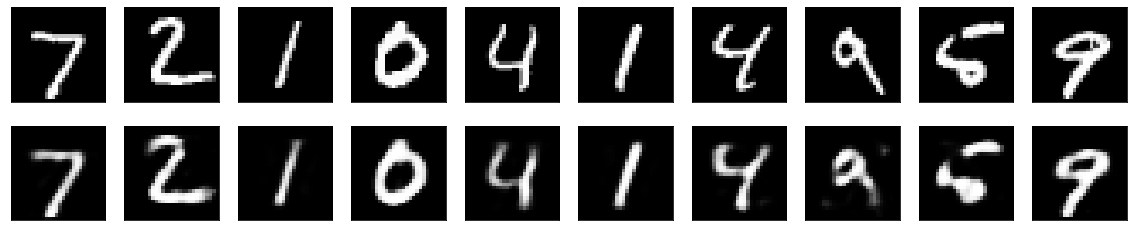

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# this is the size of our encoded representations (reduced dimensionality)
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# prepare inputs (from MNIST databse)
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# normalize images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)
